<h1><center>ECE 449 - Intelligent Systems Engineering<br><br>
Lab 3-D42: Fuzzy Logic Concepts</center></h1>
<hr>
<b> Lab date:</b> <i> Thursday, October 28, 2021 -- 2:00 - 4:50 PM </i>
<br>
<b> Room:</b> <i>  ETLC E5-013 </i>
<br>
<b> Lab report due:</b> <i>Wednesday, November 10, 2021 -- 3:50 PM </i>
<hr>

<h2>1. Objectives</h2>
The objectives of this lab are to become familiar with the basic concepts of fuzzy logic.  These concepts include:
<ul>
    <li>defining membership functions and modifying them with linguistic terms</li>
    <li>performing various operations on fuzzy sets</li>
    <li>representing fuzzy sets using $\alpha$-cuts</li>
    <li>constructing fuzzy relations, projections, and cylindrical extensions</li>
    <li>performing composition and using it in compositional rules of inference</li>
</ul>

<h2>2. Expectations</h2>
Complete the pre-lab, and hand it in before the lab starts.  A formal lab report is required for this lab, which will be the completed version of this notebook.  There is a marking guide at the end of the lab manual.  If figures are required, label the axes and provide a legend when appropriate.  An abstract, introduction, and conclusion are required as well, for which cells are provided at the end of the notebook.  The abstract should be a brief description of the topic, the introduction a description of the goals of the lab, and the conclusion a summary of what you learned, what you found difficult, and your own ideas and observations.

<h2>3. Pre-lab</h2>
&emsp;1. Why is defuzzification an important step when using fuzzy sets?
<br><br>
We also strongly recommend that you look over section 1 of the Python supplement to familiarize yourself with Jupyter notebooks and install the necessary libraries for future labs.

<h2>4. Introduction</h2>
<i>Fuzzy logic</i> is a form of logic in which the truth values of variables can range from the interval of 0 to 1, instead of exclusively 0 or 1.  This can be used to solve problems in a more human-like reasoning way by allowing gradual membership in sets. These fuzzy sets form inputs and outputs to linguistic relations that can be easily constructed, such as:

<center><b>IF</b> <i>temp</i> <b>IS</b> HOT <b>THEN</b> <i>fan</i> <b>IS</b> HIGH</center>

An important concept is the <i>linguistic variable</i>, which is a variable whose values are words. In the example above, the <i>linguistic variable</i> "temp" takes the value "HOT".
<br>
Employing fuzzy systems requires the user to first define membership functions that take values from 0 to 1, and are defined over the region of interest, called the <i>universe set</i>. One can apply linguistic modifiers (<i>hedges</i>) to modify the meaning of a fuzzy set, such as:

<center><i>temp</i> <b>IS</b> VERY HOT, rather than <i>temp</i> <b>IS</b> HOT</center>
A <i>hedge</i> in this case is VERY.

<br>
Similar to crisp sets, the <i>union</i>, <i>intersection</i>, and <i>complement</i> operators can be performed on fuzzy sets.  They may also be represented using a family of crisp sets, by using <i>$\alpha$-cuts</i>.
<br>
Finally, similarly to crisp relations, which is the mapping between two crisp sets, fuzzy sets can form <i>relations</i> between two membership functions of different universes. These relations bring forth more operations, such as <i>cylindrical closure</i>, <i>sup-min composition</i>, <i>compositional rule of inference</i>, and <i>defuzzification</i>. <i>Cylindrical closure</i> is a fuzzy relation that corresponds to the cross-product domain of linguistic variables.

<h2>5. Background</h2>
Automatic monitoring stations are used to characterize the quality of the environment in the Arctic by collecting meteorological data at regular intervals.  Because of how remote these locations are, the monitoring stations are designed to generate and store power from renewable resources, namely the sun and wind, to minimize the frequency of maintenance required.  However, due to the polar nights and long winters, solar radiation reaching the ground during these times is very low or non-existent.  Consequently, this can lead to long intervals during which there is no remaining power, and no data is collected.  To avoid this, the duty cycle of the monitoring station can be adjusted in order to conserve power.  A controller to determine the optimal duty cycle can be built using fuzzy logic based on two factors: <i>state of charge</i> (SOC) of the battery and <i>future average power</i> (P) from the renewable resources.  For example, one such rule could be as follows:

<center><b>IF</b> <i>state of charge</i> <b>IS</b> LOW <b>AND</b> <i>future average power</i> <b>IS</b> MEDIUM <b>THEN</b> <i>duty cycle<i> <b>IS</b> MEDIUM</center>
<br>
In the case where this rule would apply, the monitoring station could only take measurements for around half of its regular period to conserve power, and obtain data more frequently than what the previous method would offer.  The next two labs will focus on this concept and work towards building a fuzzy controller to manage the power consumption of a monitoring station.

<h2>6. Experimental Procedure</h2>
If you have not yet installed the skfuzzy library, run the cell below.

In [1]:

# "--user" is essential to install in local environment"
!pip install scikit-fuzzy==0.4.2

Run the cell below to import the libraries required to complete this lab.

In [2]:
%matplotlib inline

import numpy as np                          # General math operations
import matplotlib.pyplot as plt             # Data visualization
from mpl_toolkits.mplot3d import Axes3D     # 3D data visualization
import skfuzzy as fuzz                      # Fuzzy toolbox

<h4>Exercise 1:&nbsp;&nbsp; Membership functions</h4>
Consider a weather station with a battery that has a minimum SOC of 20% and a maximum SOC of 100%.
<br>
<ol>
    <li>Define the universe set for SOC from 20 to 100, using 81 discrete elements.</li>
</ol>

In [3]:
X = np.linspace(20,100,81)

<ol start=2>
    <li>Plot the trapezoidal membership functions, LOW, MEDIUM, and HIGH, on one figure according to the parameters given below.</li>
</ol>

\begin{array}{l c c c c}
\hline
Fuzzy\ set & a & b & c & d \\
\hline
LOW & 20 & 20 & 22 & 38 \\
MEDIUM & 22 & 38 & 42 & 58 \\
HIGH & 42 & 58 & 100 & 100\\
\hline
\end{array}

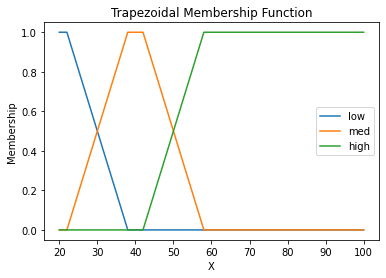

In [4]:
Low = fuzz.trapmf(X,[20,20,22,38])
Med = fuzz.trapmf(X,[22,38,42,58])
High = fuzz.trapmf(X,[42,58,100,100])
plt.plot(X,Low, label="low")
plt.plot(X,Med, label="med")
plt.plot(X,High, label="high")
plt.xlabel("X")
plt.ylabel("Membership")
plt.title("Trapezoidal Membership Function")
plt.legend()
plt.show()


<h4>Exercise 2:&nbsp;&nbsp; Linguistic modifiers</h4>
Modify the fuzzy set HIGH SOC to VERY HIGH SOC and MORE OR LESS HIGH SOC.
<br>
<ol>
    <li>Plot HIGH, VERY HIGH, and MORE OR LESS HIGH on the same figure.</li>
</ol>

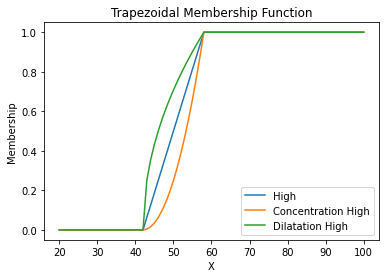

In [5]:
ConHigh = [i**2 for i in High]
DilHigh = [i**(1/2) for i in High]
plt.plot(X,High, label="High")
plt.plot(X,ConHigh, label="Concentration High")
plt.plot(X,DilHigh, label="Dilatation High")
plt.xlabel("X")
plt.ylabel("Membership")
plt.title("Trapezoidal Membership Function")
plt.legend()
plt.show()

<h4>Exercise 3:&nbsp;&nbsp; Fuzzy set operations</h4>
On separate figures, plot the following fuzzy sets:
<br>
<ol>
    <li>Union of LOW and MEDIUM</li>
</ol>

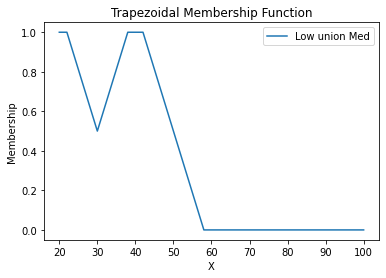

In [6]:
[X, union] = fuzz.fuzzy_or(X,Low,X,Med)
plt.plot(X,union, label="Low union Med")
plt.xlabel("X")
plt.ylabel("Membership")
plt.title("Trapezoidal Membership Function")
plt.legend()
plt.show()

<ol start=2>
    <li>Intersection of LOW and MEDIUM</li>
</ol>

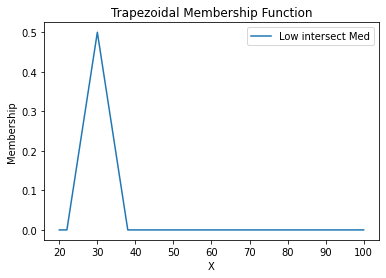

In [7]:
[X, intersect] = fuzz.fuzzy_and(X,Low,X,Med)
plt.plot(X,intersect, label="Low intersect Med")
plt.xlabel("X")
plt.ylabel("Membership")
plt.title("Trapezoidal Membership Function")
plt.legend()
plt.show()

<ol start=3>
    <li>Complement of HIGH</li>
</ol>

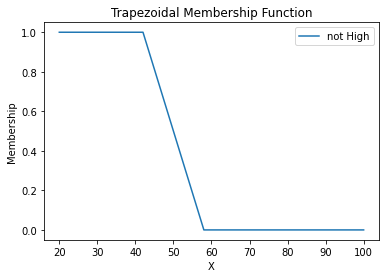

In [8]:
compliment = fuzz.fuzzy_not(High)
plt.plot(X,compliment, label="not High")
plt.xlabel("X")
plt.ylabel("Membership")
plt.title("Trapezoidal Membership Function")
plt.legend()
plt.show()

<h4>Exercise 4:&nbsp;&nbsp; $\alpha$-cuts</h4>
Using the HIGH SOC fuzzy set,
<br>
<ol>
    <li>Plot the individual $\alpha$-cuts for $\alpha$ = {1.0, 0.75, 0.50, 0.25} on the same figure.</li>
</ol>

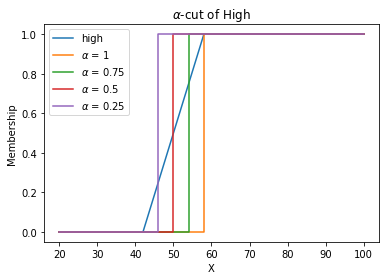

In [9]:
alphaCuts = [1, 0.75, 0.5, 0.25]
Ahandle ,= plt.plot(X, High, label = "high")
ydata = []
for alphacut in alphaCuts:
    cut = (High >= alphacut)
    ydata.append(cut)
    aCutHandle ,= plt.step(X, cut, where = 'post', label = r'$\alpha$ = '+ str(alphacut))
plt.xlabel("X")
plt.ylabel("Membership")
plt.title(r'$\alpha$-cut of High')
plt.legend()
plt.show()                

<ol start=2>
    <li>Plot the original fuzzy set and its $\alpha$-cut reconstruction on the same figure.</li>
</ol>
&emsp;HINT: The <b>np.amax()</b> function is helpful in reconstructing the fuzzy set.

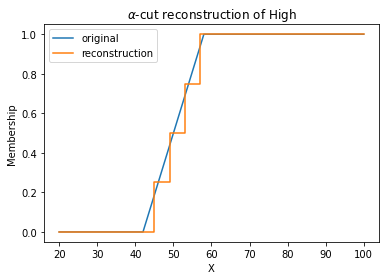

In [10]:
cut = []
for i in range(4):
    temp = np.array([j*alphaCuts[i] for j in ydata[i]])
    cut.append(temp)
cut = np.amax(cut, axis = 0)
Ahandle ,= plt.plot(X, High, label = "original")
aCutHandle ,= plt.step(X, cut,  label = 'reconstruction')
plt.xlabel("X")
plt.ylabel("Membership")
plt.title(r'$\alpha$-cut reconstruction of High')
plt.legend()
plt.show()      

<ol start=3>
    <li>Comment on the quality of the $\alpha$-cut reconstruction.</li>
</ol>

<h4>Exercise 5:&nbsp;&nbsp; Relations - Cylindrical closure</h4>
Based off of typical meteorological data, the locations in which the monitoring stations are situated can only provide future average power from 0W to 100W.
<br>
<ol>
    <li>Define the universe set for future average power from 0 to 100, using 101 discrete elements.</li>
</ol>

In [11]:
X1 = np.linspace(0,100,101)

<ol start=2>
    <li>Plot the trapezoidal membership functions, SCARCE, AVERAGE, and ABUNDANT in one figure, according to the parameters given below.</li>
</ol>

\begin{array}{l c c c c}
\hline
Fuzzy\ set & a & b & c & d \\
\hline
SCARCE & 0 & 0 & 30 & 35 \\
AVERAGE & 30 & 35 & 40 & 45 \\
ABUNDANT & 40 & 45 & 100 & 100\\
\hline
\end{array}

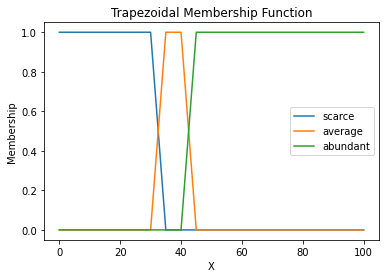

In [12]:
scarce = fuzz.trapmf(X1,[0,0,30,35])
average = fuzz.trapmf(X1,[30,35,40,45])
abundant = fuzz.trapmf(X1,[40,45,100,100])
plt.plot(X1,scarce, label="scarce")
plt.plot(X1,average, label="average")
plt.plot(X1,abundant, label="abundant")
plt.xlabel("X")
plt.ylabel("Membership")
plt.title("Trapezoidal Membership Function")
plt.legend()
plt.show()

<ol start=3>
    <li>Using <i>Larsen implication</i>, define the relation $R(MEDIUM,\ AVERAGE)$.  Plot the relation matrix.</li>
</ol>

C:\Users\Dariu\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


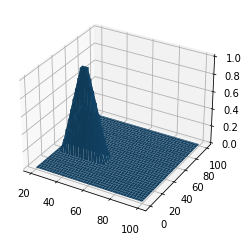

In [13]:
larsen = fuzz.relation_product(Med, average)
fig = plt.figure()
[gx,gy] = np.meshgrid(X,X1, indexing = 'ij')
ax = fig.gca(projection = '3d')
ax.plot_surface(gx, gy, larsen)

<ol start=4>
    <li>What is the meaning of the individual rows of the relation matrix?  What does the first row mean?</li>
</ol>

<h4>Exercise 6:&nbsp;&nbsp; Sup-min composition</h4>
Three monitoring stations positioned at different locations are checked, accordingly, the membership values of SOC fuzzy sets are assigned. The findings are expressed as a relation, $LocationSOC(location, state\ of\ charge)$, and defined using the following matrix:

<center>
$
LocationSOC =
  \begin{bmatrix}
    0.84 & 0.08 & 0 \\
    0.03 & 0.5  & 0.08 \\
    0    & 0.1  & 0.8 
  \end{bmatrix}
$
</center>

Each row in the matrix corresponds to a monitoring station, and the columns give the membership values in the fuzzy sets, LOW, MEDIUM, and HIGH, respectively.  For example, the last monitoring station has a 0 LOW, 0.1 MEDIUM, and a 0.8 HIGH SOC.
<br>
Additionally, it was determined how the SOC of the monitoring station corresponds to the future average power of its location.  This is represented by the relation, $SOCPower(state\ of\ charge, future\ average\ power)$, found below.

<center>
$
SOCPower =
  \begin{bmatrix}
    1 & 0.3 & 0 \\
    0.2 & 0.5  & 0.3 \\
    0    & 0.5  & 1 
  \end{bmatrix}
$
</center>
<ol>
    <li>Determine the max-min composition $c_{1} = LocationSOC \circ SOCPower$ and $c_{2} = SOCPower^{T} \circ LocationSOC^{T}$ and print the resulting matrices.</li>
</ol>

In [14]:
locationSoc = np.array([[0.84, 0.08,0],[0.03, 0.5,0.08], [0,0.1,0.8]])
socPower = np.array([[1,0.3,0],[0.2,0.5,0.3],[0,0.5,1]])
c1 = fuzz.maxmin_composition(locationSoc, socPower)
c2 = fuzz.maxmin_composition(np.transpose(socPower), np.transpose(locationSoc))
print("C_1: \n",c1)
print("C_2: \n",c2)

C_1: 
 [[0.84 0.3  0.08]
 [0.2  0.5  0.3 ]
 [0.1  0.5  0.8 ]]
C_2: 
 [[0.84 0.2  0.1 ]
 [0.3  0.5  0.5 ]
 [0.08 0.3  0.8 ]]


<ol start=2>
    <li>How can you interpret these relations?</li>
</ol>

<h4>Exercise 7:&nbsp;&nbsp; Compositional rule of inference</h4>
Another monitoring station was checked and found to have a SOC of 28%.  Use a compositional rule of inference to determine the future average power fuzzy set based on the knowledge of a monitoring station with LOW SOC in a location with SCARCE future average power.
<br>
<ol>
    <li>Express the item as a fuzzy singleton on the SOC universe set.</li>
</ol>

In [15]:
# range from 20-100
current = np.zeros(81)
current[28-20] = 1

<ol start=2>
    <li>Use <i>Mamdani implication</i> to define the relation between LOW and SCARCE.</li>
</ol>

In [16]:
mamdani = fuzz.relation_min(Low, scarce)

<ol start=3>
    <li>Use the relation from exercise 6 to derive the associated fuzzy set.  Print this fuzzy set as a vector.</li>
</ol>

In [17]:
set = fuzz.maxmin_composition(current, mamdani)
print(set)

[[0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625
  0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625
  0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.625 0.6   0.4   0.2   0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.   ]]


<h4>Exercise 8:&nbsp;&nbsp; Defuzzification</h4>
Determine the crisp value of the fuzzy set obtained from the compositional rule of inference applied in the previous exercise.  Use the Mean of Maxima (MOM) defuzzification method.
<br>
<ol>
    <li>Print the resulting future average power of the location.</li>
</ol>

In [18]:
crispValue = fuzz.defuzz(X1, set, 'mom')
print(crispValue)

15.5


<hr>
<hr>

<h2>Abstract</h2>

<h2>Introduction</h2>

<h2>Conclusion</h2>

<center>
<h3>Lab 1 Marking Guide</h3>
<hr>
</center>

\begin{array}{@{}clcc@{}}
\textbf{Exercise} & \textbf{Item}           & \textbf{Total Marks} & \textbf{Earned Marks} \\ 
\hline
                  & Pre-lab                 & 10                    &               \\ 
                  & Abstract                & 3                     &               \\ 
                  & Introduction            & 3                     &               \\
                  & Conclusion              & 4                     &               \\
1                 & Membership\ functions	& 10                    &               \\
2                 & Linguistic\ modifiers   & 5                 	&               \\
3                 & Fuzzy\ operations       & 10                 	&               \\
4                 & Alpha\ cuts             & 10                 	&               \\
5                 & Fuzzy\ relations        & 15                 	&               \\
6                 & Sup-min\ composition    & 15                 	&               \\
7                 & CRI                     & 5                 	&               \\
8                 & Defuzzification         & 10                 	&               \\
\hline
                  & \textbf{TOTAL}          & 100                   &
\end{array}